**Project Title:** Earthquakes in the World \
**Project Team:**Jishin desu!

**Problem Definition:** The problem is the difficulties faced by countries in estimating the damage they will receive from an earthquake according to their level of development and in adjusting their budgets according to the earthquake.

In [2]:
# Install Basemap
%pip install Basemap

Note: you may need to restart the kernel to use updated packages.


Import necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr

Read csv files

In [4]:
ww_eq = pd.read_csv('Worldwide-Earthquake-Database.csv')
tech_overall = pd.read_csv('TAI2000-2018_Overall.csv')
economy_df = pd.read_csv('economy.csv')
df_lexpect = pd.read_csv('led.csv')
energy = pd.read_csv('per-capita-energy-use.csv')

**EDA OF RAW DATASETS**

Describe Raw Earthquakes Dataset

In [5]:
ww_eq.describe()

,I_D,YEAR,MONTH,DAY,HOUR,MINUTE,FOCAL_DEPTH,EQ_PRIMARY,EQ_MAG_MW,EQ_MAG_MS,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
count,6193.000000,6193.000000,5786.000000,5632.000000,4151.000000,3946.000000,3228.000000,4402.000000,1321.000000,2928.000000,...,25.00000,26.000000,1253.000000,1433.000000,453.000000,3273.000000,8.130000e+02,1777.000000,4.210000e+02,809.000000
mean,4771.385112,1805.694009,6.508296,15.741655,11.303060,28.820578,41.123916,6.459223,6.513475,6.574761,...,1910.68000,1.807692,2390.834796,1.951849,1904.812208,2.204400,1.828339e+04,2.697243,5.985086e+04,2.464771
std,3004.473731,375.314913,3.451206,8.751377,7.031131,17.153131,70.448975,1.044992,0.929940,0.990647,...,8667.79685,1.059027,27489.582539,1.079804,12509.939103,1.039891,1.955296e+05,1.051896,1.023722e+06,1.131921
min,1.000000,-2150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.600000,3.600000,2.100000,...,1.00000,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000
25%,2186.000000,1820.000000,4.000000,8.000000,5.000000,14.000000,10.000000,5.700000,5.800000,5.800000,...,5.00000,1.000000,10.000000,1.000000,5.000000,1.000000,6.300000e+01,2.000000,9.000000e+01,1.000000
50%,4688.000000,1928.000000,7.000000,16.000000,11.000000,29.000000,25.000000,6.500000,6.500000,6.600000,...,21.00000,1.000000,41.000000,1.000000,30.000000,2.000000,5.060000e+02,3.000000,6.760000e+02,3.000000
75%,6589.000000,1988.000000,9.000000,23.000000,17.000000,43.750000,40.000000,7.300000,7.200000,7.300000,...,138.00000,3.000000,200.000000,3.000000,300.000000,3.000000,3.600000e+03,3.000000,3.000000e+03,3.000000
max,10501.000000,2020.000000,12.000000,31.000000,23.000000,59.000000,675.000000,9.500000,9.500000,9.100000,...,43476.00000,4.000000,799000.000000,4.000000,220085.456000,4.000000,5.360000e+06,4.000000,2.100000e+07,4.000000


Show number of missing values in Raw Earthquakes Dataset

In [6]:
ww_eq.isnull().sum()

I_D                                      0
FLAG_TSUNAMI                             0
YEAR                                     0
MONTH                                  407
DAY                                    561
HOUR                                  2042
MINUTE                                2247
SECOND                                1846
FOCAL_DEPTH                           2965
EQ_PRIMARY                            1791
EQ_MAG_MW                             4872
EQ_MAG_MS                             3265
EQ_MAG_MB                             4391
EQ_MAG_ML                             6009
EQ_MAG_MFA                            6179
EQ_MAG_UNK                            5416
INTENSITY                             3378
COUNTRY                                  0
STATE                                 5872
LOCATION_NAME                            1
LATITUDE                                49
LONGITUDE                               49
REGION_CODE                              1
DEATHS     

Describe Raw Technology Dataset

In [7]:
tech_overall.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.229904,0.250430,0.257215,0.263075,0.274028,0.280425,0.279494,0.288205,0.291266,0.295687,0.309952,0.319973,0.325959,0.329156,0.327264,0.333766,0.329034,0.335555,0.337670
std,0.146570,0.159237,0.159261,0.159828,0.164636,0.165993,0.159354,0.159466,0.155956,0.155177,0.158154,0.157514,0.157475,0.153702,0.147819,0.147369,0.141775,0.138377,0.137876
min,0.004489,0.006374,0.014635,0.023427,0.028542,0.029980,0.031243,0.031928,0.032855,0.032066,0.033421,0.038041,0.037976,0.052148,0.053703,0.055022,0.056157,0.058962,0.060858
25%,0.105433,0.115489,0.120990,0.124071,0.129307,0.132672,0.135719,0.143179,0.139876,0.153475,0.161159,0.166232,0.167793,0.179679,0.182978,0.191644,0.203741,0.211083,0.222784
50%,0.205745,0.221641,0.227778,0.237907,0.248563,0.264933,0.267565,0.284163,0.291559,0.303021,0.311991,0.321104,0.338341,0.338641,0.340302,0.340604,0.335009,0.343145,0.346213
75%,0.312794,0.345084,0.353032,0.357294,0.368550,0.384746,0.387414,0.401346,0.404994,0.418692,0.430112,0.449231,0.457429,0.462549,0.451025,0.455110,0.446071,0.452795,0.453711
max,0.750485,0.801828,0.796778,0.790398,0.796808,0.797928,0.782319,0.789129,0.775479,0.759207,0.770777,0.752766,0.747409,0.720216,0.711493,0.717863,0.707223,0.694865,0.679527


Show number of missing values in Raw Technology Dataset

In [8]:
tech_overall.isnull().sum()

Country_Name    0
Country_Code    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
dtype: int64

Describe Raw Economy Dataset

In [9]:
economy_df.describe()

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
count,268,266,266,266,266,266,266,266,266,266,...,266,266,266,266,266,266,266,266,266,266
unique,3,1,266,266,133,134,136,136,138,147,...,256,257,258,257,256,256,256,254,250,228
top,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,266,266,1,1,133,131,129,129,129,118,...,9,8,7,8,9,9,9,11,15,37


Show number of missing values in Raw Economy Dataset

In [10]:
economy_df.isnull().sum()

Series Name      3
Series Code      5
Country Name     5
Country Code     5
1960 [YR1960]    5
                ..
2017 [YR2017]    5
2018 [YR2018]    5
2019 [YR2019]    5
2020 [YR2020]    5
2021 [YR2021]    5
Length: 66, dtype: int64

Describe Raw Life Expectancy Dataset

In [11]:
df_lexpect.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Show number of missing values in Raw Life Expectancy Dataset

In [12]:
df_lexpect.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

Describe Raw Energy Consumption Dataset

In [13]:
energy.describe()

,Year,Energy consumption per capita (kWh)
count,8961.000000,8.961000e+03
mean,1995.877581,2.983376e+04
std,13.544539,7.549302e+04
min,1965.000000,0.000000e+00
25%,1986.000000,3.249927e+03
50%,1997.000000,1.407556e+04
75%,2007.000000,3.695648e+04
max,2019.000000,1.676610e+06


Show number of missing values in Raw Energy Consumption Dataset

In [14]:
energy.isnull().sum()

Entity                                   0
Code                                   165
Year                                     0
Energy consumption per capita (kWh)      0
dtype: int64

***Cleaning and Organizing Data***

**Data For Earthquakes**

Required columns of Earthquakes dataset have been taken and renamed. The entities in the dataset are formatted.

In [15]:

# Create a new dataframe with only selected columns from the original dataframe
ww_eq = pd.DataFrame(ww_eq[['COUNTRY','YEAR','EQ_PRIMARY','FLAG_TSUNAMI','TOTAL_DAMAGE_MILLIONS_DOLLARS','TOTAL_DEATHS','LATITUDE','LONGITUDE']])

# Rename the columns by replacing underscores with spaces
ww_eq.columns = [col.replace("_", " ") for col in ww_eq.columns]

# Rename the "COUNTRY" column to "Country Name"
ww_eq = ww_eq.rename(columns={"COUNTRY": "Country Name"})

# Rename the "Total Damage Millions Dollars" column to "Total Damage Millions Dollars($)"
ww_eq = ww_eq.rename(columns={"TOTAL DAMAGE MILLIONS DOLLARS": "Total Damage Millions Dollars($)"})

# Convert the "Country Name" column to title case
ww_eq['Country Name'] = ww_eq['Country Name'].str.title()

# Convert all column names to title case
ww_eq.columns = ww_eq.columns.str.title()

# Convert the "Flag Tsunami" column to binary (1 for "Yes", 0 for "No")
ww_eq['Flag Tsunami'] = ww_eq['Flag Tsunami'].apply(lambda x: 1 if x == 'Yes' else 0)

# Display the first row of the modified dataframe
ww_eq.head(5)

,Country Name,Year,Eq Primary,Flag Tsunami,Total Damage Millions Dollars($),Total Deaths,Latitude,Longitude
0,Jordan,-2150,7.3,0,NaN,NaN,31.1,35.5
1,Syria,-2000,NaN,1,NaN,NaN,35.683,35.8
2,Turkmenistan,-2000,7.1,0,NaN,1.0,38,58.2
3,Greece,-1610,NaN,1,NaN,NaN,36.4,25.4
4,Israel,-1566,NaN,0,NaN,NaN,31.5,35.3


Here, missing damage information of earthquakes is filled with the average of the total damage received in the same country that year. If there was no other earthquake in the country that year, it was filled with the average of the damage received from all earthquakes in that country. In addition, lower bounds and upper bounds were set for the data in order to work with more appropriate earthquake data.

In [16]:
# Calculate the mean for each country-year combination
mean_by_country_year = ww_eq.groupby(['Country Name', 'Year'])[['Total Damage Millions Dollars($)', 'Total Deaths']].mean()

# Calculate the mean for each country over all years
mean_by_country = ww_eq.groupby(['Country Name'])[['Total Damage Millions Dollars($)', 'Total Deaths']].mean()

# Fill null values in TOTAL_DAMAGE_MILLIONS_DOLLARS and TOTAL_DEATHS with the mean for the corresponding country-year combination, if it exists
ww_eq['Total Damage Millions Dollars($)'] = ww_eq.apply(lambda row: mean_by_country_year.loc\
                                                        [(row['Country Name'], row['Year']),\
                                                         'Total Damage Millions Dollars($)']\
                                                        if pd.notnull\
                                                        (row['Total Damage Millions Dollars($)'])\
                                                        else mean_by_country.loc\
                                                        [row['Country Name'],'Total Damage Millions Dollars($)'],\
                                                        axis=1)
ww_eq['Total Deaths'] = ww_eq.apply(lambda row: mean_by_country_year.loc\
                                    [(row['Country Name'], row['Year']), 'Total Deaths']\
                                    if pd.notnull(row['Total Deaths'])\
                                    else mean_by_country.loc[row['Country Name'], 'Total Deaths'], axis=1)

# Select rows from the dataframe where the "Total Deaths" column is greater than 20 and less than 17500
ww_eq = ww_eq[(ww_eq["Total Deaths"] > 20) & (ww_eq["Total Deaths"] <17500)]

# Drop rows with missing or null values in the Latitude and Longitude columns
ww_eq = ww_eq.dropna(subset=["Latitude","Longitude"])

# Check if there are any blank spaces in the "Latitude" column
blank_spaces = ww_eq["Latitude"].str.contains(" ")

# Drop rows with blank spaces in the "Latitude" column
ww_eq = ww_eq[~ww_eq["Latitude"].str.contains(" ")]
# Drop rows with blank spaces in the "Longitude" column
ww_eq = ww_eq[~ww_eq["Longitude"].str.contains(" ")]

# Convert the "Latitude" and "Longitude" columns to float type
ww_eq['Latitude'] = ww_eq['Latitude'].astype(float)
ww_eq['Longitude'] = ww_eq['Longitude'].astype(float)

As we can see below, we have 6193 data in total, but only 11 of them show damage greater than 15000. In order to work with more relevant data, we filtered out these values

In [17]:
print(ww_eq.shape)
print(ww_eq[ww_eq["Total Damage Millions Dollars($)"] > 15000].shape)
ww_eq = ww_eq[ww_eq["Total Damage Millions Dollars($)"] < 15000]

(4823, 8)
(11, 8)


**Data for Technology Achievement Index**

Here missing values filled with means of the columns and column names are formatted by written "rename" function.

In [18]:
# Replace missing values with the mean of the column
tech_overall = tech_overall.fillna(tech_overall.mean(axis=0))

# Rename the columns by replacing underscores with spaces
tech_overall.columns = [col.replace("_", " ") for col in tech_overall.columns]

C:\Users\Hp\AppData\Local\Temp\ipykernel_8412\3176353441.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tech_overall = tech_overall.fillna(tech_overall.mean(axis=0))


Dataset reshaped to be merged with Earthquakes Dataset

In [19]:
# Reshape the dataframe from wide to long format, with the specified columns as id variables
tech_overall_melted = pd.melt(tech_overall, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Value')

# Convert the "Year" column to float type
tech_overall_melted['Year'] = tech_overall_melted['Year'].astype(float)

The Technology Dataset is being merged with the Earthquakes Dataset.

In [20]:
# Merge the two dataframes on the "Country Name" and "Year" columns
merged_tech = pd.merge(ww_eq, tech_overall_melted, on=['Country Name','Year'])

# Display the first five rows of the merged dataframe
merged_tech.head(5)

,Country Name,Year,Eq Primary,Flag Tsunami,Total Damage Millions Dollars($),Total Deaths,Latitude,Longitude,Country Code,Value
0,India,2000,4.6,0,362.577778,1835.117647,22.132,92.771,IND,0.151665
1,China,2000,5.1,0,2219.880341,7618.511194,40.498,122.994,CHN,0.306434
2,China,2000,6.3,0,2219.880341,7618.511194,26.856,97.238,CHN,0.306434
3,Japan,2000,7.6,0,14681.068741,2983.394958,22.338,143.730,JPN,0.582759
4,Japan,2000,6.1,1,14681.068741,2983.394958,34.319,139.260,JPN,0.582759


**Data for Economy**

Required columns are taken.

In [21]:
# Create a new dataframe with only the selected columns from the original dataframe
economy_df = pd.DataFrame(economy_df[['Country Name','Country Code','2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',\
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]']])

This function written to rename columns of datasets.

In [22]:
def rename(data_frame,column_name):
    # Flag to track if the column exists
    exist = False
    # Iterate over the column names in the dataframe
    for i in data_frame.columns.values:
        # Check if the column name is the one specified and contains '[',
        # and if so, set the flag to True and store the index of the column
        if i == column_name and "[" in column_name:
            exist = True
            index = data_frame.columns.get_loc(i)
            # Rename the column and set the inplace flag to True to modify the dataframe in place
            data_frame.rename(columns = {data_frame.columns[index]: column_name.split(' [')[0]},inplace =True)
            break

Here rename function applied to Economy Dataset

In [23]:
# Iterate over the columns in the dataframe
for i in economy_df.columns:
  # Rename the column if its name contains '[', using the function defined earlier
  rename(economy_df,i)

# Display the first two rows of the modified dataframe
economy_df.head(2)

,Country Name,Country Code,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,20497126770.1335,19134211763.859,18116562464.9088,18753469630.2586,18053228578.8878,18799450742.7823,20116137325.8206,..
1,Albania,ALB,13228147516.1168,11386850129.8411,11861199830.8396,13019689336.6919,15156432309.8977,15401830754.0773,15131866270.5936,18260043499.8068


Fill missing economy values of countries with mean of that country's economy values. 

In [24]:
economy_df = economy_df.fillna(economy_df.mean(axis=1))

C:\Users\Hp\AppData\Local\Temp\ipykernel_8412\1851882565.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  economy_df = economy_df.fillna(economy_df.mean(axis=1))


Dataset reshaped to be merged with Earthquakes Dataset

In [25]:
# Reshape the dataframe from wide to long format, with the specified columns as id variables
economy_melted = pd.melt(economy_df, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Value')

# Convert the column names to title case
economy_melted.columns = economy_melted.columns.str.title()

# Convert the "Year" column to float type
economy_melted['Year'] = economy_melted['Year'].astype(float)

The Economy Dataset is being merged with the Earthquakes Dataset. In order to work with more appropriate data, the lower and upper limits of the damage received were set.

In [26]:
# Merge the two dataframes on the 'Country Name' and 'Year' columns
merged_economy = pd.merge(ww_eq, economy_melted, on=['Country Name', 'Year'])

# Select rows from the merged dataframe where the "Total Damage Millions Dollars" column is greater than 600 and less than 17500
merged_economy = merged_economy[(merged_economy["Total Damage Millions Dollars($)"] > 600) & \
                                (merged_economy["Total Damage Millions Dollars($)"] <17500)]
merged_economy = merged_economy.rename(columns=\
                                       {"Total Damage Millions Dollars($)":\
                                        "Total Damage Millions Dollars($)"})
# Display the first five rows of the modified dataframe
merged_economy.head(5)

,Country Name,Year,Eq Primary,Flag Tsunami,Total Damage Millions Dollars($),Total Deaths,Latitude,Longitude,Country Code,Value
1,New Zealand,2014,6.1,0,4772.500000,46.900000,-40.660,175.814,NZL,201313497220.917
2,New Zealand,2014,6.9,1,4772.500000,46.900000,-29.977,-177.725,NZL,201313497220.917
5,Greece,2014,6.1,0,2339.000000,1494.754717,38.208,20.453,GRC,235458133124.608
6,Greece,2014,6.0,0,860.123077,1494.754717,38.244,20.379,GRC,235458133124.608
7,China,2014,6.9,0,2219.880341,7618.511194,35.905,82.586,CHN,10475682920597.7


Data for Life Expectancy

Required columns are taken.

In [27]:
# Rename the "Lifeexpectancy" column to "Life Expectancy"
df_lexpect = df_lexpect.rename(columns={"Lifeexpectancy": "Life Expectancy"})

# Create a new dataframe with only the selected columns from the original dataframe
df_lexpect = df_lexpect[['Country','Year','Life Expectancy']]

Rename and Format Columns

In [28]:
# Convert the column names to title case
df_lexpect.columns = df_lexpect.columns.str.title()

# Rename the "Country" column to "Country Name"
df_lexpect = df_lexpect.rename(columns={"Country":"Country Name"})

Fill missing Life Expectancy values of countries with mean of that country's Life Expectancy values.

In [29]:
df_lexpect = df_lexpect.fillna(df_lexpect.mean(axis=1))

C:\Users\Hp\AppData\Local\Temp\ipykernel_8412\158918190.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_lexpect = df_lexpect.fillna(df_lexpect.mean(axis=1))


The Life Expectancy Dataset is being merged with the Earthquakes Dataset.

In [30]:
# Merge the two dataframes on the "Country Name" and "Year" columns
merged_lexpect = pd.merge(ww_eq, df_lexpect, on=['Country Name','Year'])

# Display the first five rows of the merged dataframe
merged_lexpect.head(5)

,Country Name,Year,Eq Primary,Flag Tsunami,Total Damage Millions Dollars($),Total Deaths,Latitude,Longitude,Life Expectancy
0,India,2000,4.6,0,362.577778,1835.117647,22.132,92.771,62.5
1,China,2000,5.1,0,2219.880341,7618.511194,40.498,122.994,71.7
2,China,2000,6.3,0,2219.880341,7618.511194,26.856,97.238,71.7
3,Japan,2000,7.6,0,14681.068741,2983.394958,22.338,143.730,81.1
4,Japan,2000,6.1,1,14681.068741,2983.394958,34.319,139.260,81.1


***Data for Energy Consumption***

Required columns are taken and renamed. 

In [31]:
energy.columns

Index(['Entity', 'Code', 'Year', 'Energy consumption per capita (kWh)'], dtype='object')

In [32]:
# Remove the "Code" column from the dataframe
energy = energy.drop(axis = 1,labels = ["Code"])

# Rename the "Entity" column to "Country Name"
energy = energy.rename(columns={"Entity": "Country Name"})

# Rename the "Entity" column to "Country Name"
energy = energy.rename(columns={"Energy consumption per capita (kWh)": "Energy consumption (kWh)"})

# Convert the column names to title case
energy.columns = energy.columns.str.title()

# Display the first row of the modified dataframe
energy.head(1)

,Country Name,Year,Energy Consumption (Kwh)
0,Afghanistan,1980,581.932201


The Energy Consumption Dataset is being merged with the Earthquakes Dataset.

In [33]:
# Merge the two dataframes on the "Country Name" and "Year" columns
merged_energy = pd.merge(ww_eq, energy, on=['Country Name','Year'])
# Display the first five rows of the merged dataframe
merged_energy.head(5)

,Country Name,Year,Eq Primary,Flag Tsunami,Total Damage Millions Dollars($),Total Deaths,Latitude,Longitude,Energy Consumption (Kwh)
0,China,1965,5.5,0,2219.880341,7618.511194,35.0,111.63,2115.707306
1,China,1965,6.1,0,2219.880341,7618.511194,22.4,101.60,2115.707306
2,China,1965,6.6,0,2219.880341,7618.511194,43.9,87.80,2115.707306
3,Indonesia,1965,7.6,1,483.055421,71.000000,-2.4,126.10,839.648074
4,Iran,1965,5.1,0,474.352381,7445.809091,37.6,47.10,3974.751894


Drop rows with missing or null values in the Eq Primary column

In [34]:
# Drop rows with missing or null values in the Eq Primary column
merged_energy = merged_energy.dropna(subset= ["Eq Primary"])

As we can see below, we have 1276 data in total, but only 62 of them show Energy Consumption greater than 50000. In order to work with more relevant data, we filtered out these values

In [35]:
print(merged_energy.shape)
print(merged_energy[merged_energy["Energy Consumption (Kwh)"]>50000].shape)
merged_energy = merged_energy[merged_energy["Energy Consumption (Kwh)"]< 50000]

(1270, 9)
(62, 9)


***EDA OF MERGED DATASETS***

In [36]:
print(merged_economy.shape)
print(merged_economy.isnull().sum())
merged_economy.head(5)

(77, 10)
Country Name                        0
Year                                0
Eq Primary                          0
Flag Tsunami                        0
Total Damage Millions Dollars($)    0
Total Deaths                        0
Latitude                            0
Longitude                           0
Country Code                        0
Value                               0
dtype: int64


,Country Name,Year,Eq Primary,Flag Tsunami,Total Damage Millions Dollars($),Total Deaths,Latitude,Longitude,Country Code,Value
1,New Zealand,2014,6.1,0,4772.500000,46.900000,-40.660,175.814,NZL,201313497220.917
2,New Zealand,2014,6.9,1,4772.500000,46.900000,-29.977,-177.725,NZL,201313497220.917
5,Greece,2014,6.1,0,2339.000000,1494.754717,38.208,20.453,GRC,235458133124.608
6,Greece,2014,6.0,0,860.123077,1494.754717,38.244,20.379,GRC,235458133124.608
7,China,2014,6.9,0,2219.880341,7618.511194,35.905,82.586,CHN,10475682920597.7


In [37]:
print(merged_energy.shape)
print(merged_energy.isnull().sum())
merged_energy.head(5)

(1208, 9)
Country Name                        0
Year                                0
Eq Primary                          0
Flag Tsunami                        0
Total Damage Millions Dollars($)    0
Total Deaths                        0
Latitude                            0
Longitude                           0
Energy Consumption (Kwh)            0
dtype: int64


,Country Name,Year,Eq Primary,Flag Tsunami,Total Damage Millions Dollars($),Total Deaths,Latitude,Longitude,Energy Consumption (Kwh)
0,China,1965,5.5,0,2219.880341,7618.511194,35.0,111.63,2115.707306
1,China,1965,6.1,0,2219.880341,7618.511194,22.4,101.60,2115.707306
2,China,1965,6.6,0,2219.880341,7618.511194,43.9,87.80,2115.707306
3,Indonesia,1965,7.6,1,483.055421,71.000000,-2.4,126.10,839.648074
4,Iran,1965,5.1,0,474.352381,7445.809091,37.6,47.10,3974.751894


In [38]:
print(merged_lexpect.shape)
print(merged_lexpect.isnull().sum())
merged_lexpect.head(5)

(442, 9)
Country Name                        0
Year                                0
Eq Primary                          0
Flag Tsunami                        0
Total Damage Millions Dollars($)    0
Total Deaths                        0
Latitude                            0
Longitude                           0
Life Expectancy                     0
dtype: int64


,Country Name,Year,Eq Primary,Flag Tsunami,Total Damage Millions Dollars($),Total Deaths,Latitude,Longitude,Life Expectancy
0,India,2000,4.6,0,362.577778,1835.117647,22.132,92.771,62.5
1,China,2000,5.1,0,2219.880341,7618.511194,40.498,122.994,71.7
2,China,2000,6.3,0,2219.880341,7618.511194,26.856,97.238,71.7
3,Japan,2000,7.6,0,14681.068741,2983.394958,22.338,143.730,81.1
4,Japan,2000,6.1,1,14681.068741,2983.394958,34.319,139.260,81.1


In [39]:
print(merged_tech.shape)
print(merged_tech.isnull().sum())
merged_tech.head(5)

(558, 10)
Country Name                        0
Year                                0
Eq Primary                          0
Flag Tsunami                        0
Total Damage Millions Dollars($)    0
Total Deaths                        0
Latitude                            0
Longitude                           0
Country Code                        0
Value                               0
dtype: int64


,Country Name,Year,Eq Primary,Flag Tsunami,Total Damage Millions Dollars($),Total Deaths,Latitude,Longitude,Country Code,Value
0,India,2000,4.6,0,362.577778,1835.117647,22.132,92.771,IND,0.151665
1,China,2000,5.1,0,2219.880341,7618.511194,40.498,122.994,CHN,0.306434
2,China,2000,6.3,0,2219.880341,7618.511194,26.856,97.238,CHN,0.306434
3,Japan,2000,7.6,0,14681.068741,2983.394958,22.338,143.730,JPN,0.582759
4,Japan,2000,6.1,1,14681.068741,2983.394958,34.319,139.260,JPN,0.582759


***Visualization Part***

Basemap for distribution of earthquakes in the world

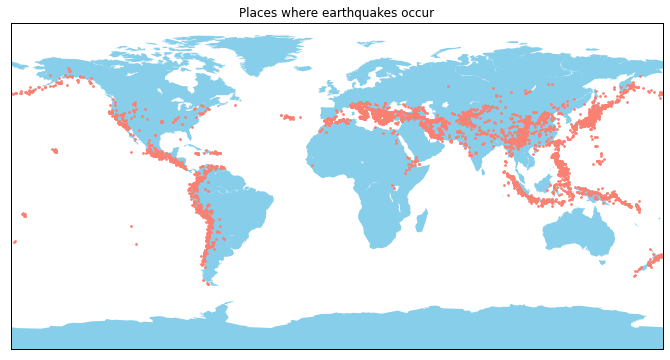

In [40]:
# Create a map with the Basemap library
m = Basemap()

# Set size of Basemap 
fig, ax = plt.subplots(figsize=(12, 6))

# Fill the continents with a color and draw a white border around the map
m.fillcontinents(color= "skyblue", lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

# Project the longitude and latitude coordinates onto the map
x, y = m(ww_eq['Longitude'], ww_eq['Latitude'])

# Plot a scatter plot on the map using the projected coordinates
plt.scatter(x, y, 3, marker='o', color='salmon') 

# Set the title of the plot
plt.title('Places where earthquakes occur')

# Show the plot
plt.show()

Plots of Merged Datasets without defining a limit for magnitude of earthquakes

C:\Users\Hp\AppData\Local\Temp\ipykernel_8412\603480792.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Energy Consumption vs. Total Damage Millions Dollars($)')

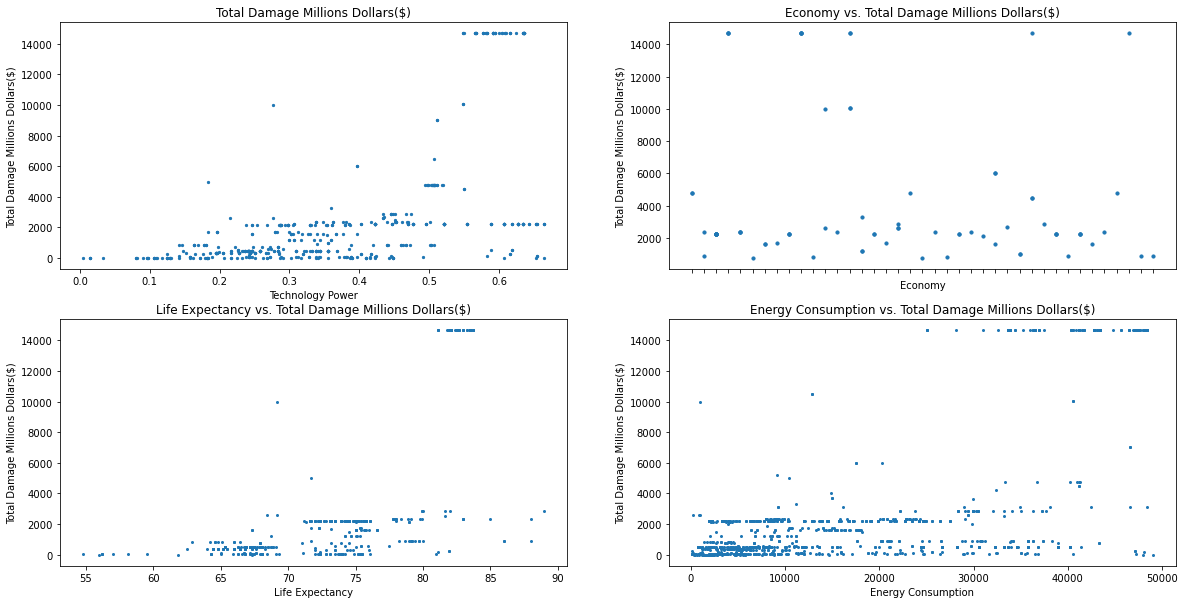

In [41]:
# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Extract the "Value" and "Total Damage Millions Dollars" columns from the dataframe, for rows where the "Eq Primary" column is greater than 8
x1 = merged_tech['Value']
y1 = merged_tech['Total Damage Millions Dollars($)']

# Plot the first scatter plot in the first subplot
axs[0, 0].scatter(x1, y1,s = 5)

# Add labels and a title to the plot
axs[0, 0].set_xlabel('Technology Power')
axs[0, 0].set_ylabel('Total Damage Millions Dollars($)')
axs[0, 0].set_title('Total Damage Millions Dollars($)')

# Extract the "Value" and "Total Damage Millions Dollars" columns from the dataframe, for rows where the "Eq Primary" column is between 7 and 8
x2 = merged_economy['Value']
y2 = merged_economy['Total Damage Millions Dollars($)']

# Plot the second scatter plot in the second subplot
axs[0, 1].scatter(x2, y2,s = 10)

# Add labels and a title to the plot
axs[0, 1].set_xlabel('Economy')
axs[0, 1].set_ylabel('Total Damage Millions Dollars($)')
axs[0, 1].set_title('Economy vs. Total Damage Millions Dollars($)')

# Rotate the x-axis labels on the second plot
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)

# Extract the "Life Expectancy" and "Total Damage Millions Dollars" columns from the dataframe, for rows where the "Eq Primary" column is greater than 8
x3 = merged_lexpect['Life Expectancy']
y3 = merged_lexpect['Total Damage Millions Dollars($)']

# Plot the third scatter plot in the third subplot
axs[1, 0].scatter(x3, y3,s = 4)

# Add labels and a title to the plot
axs[1, 0].set_xlabel('Life Expectancy')
axs[1, 0].set_ylabel('Total Damage Millions Dollars($)')
axs[1, 0].set_title('Life Expectancy vs. Total Damage Millions Dollars($)')

# Extract the "Energy Consumption Per Capita (Kwh)" and "Total Damage Millions Dollars" columns from the dataframe, for rows where the "Eq Primary" column is between 8 and 9
x4 = merged_energy['Energy Consumption (Kwh)']
y4 = merged_energy['Total Damage Millions Dollars($)']
# Plot the third scatter plot in the fourth subplot
axs[1, 1].scatter(x4, y4,s = 4)

# Add labels and a title to the plot
axs[1, 1].set_xlabel('Energy Consumption')
axs[1, 1].set_ylabel('Total Damage Millions Dollars($)')
axs[1, 1].set_title('Energy Consumption vs. Total Damage Millions Dollars($)')

Technology Data Scatter Plot

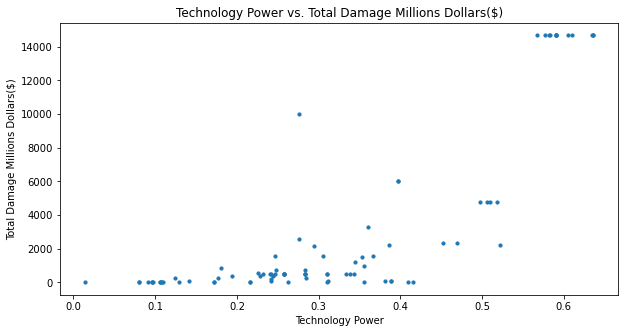

In [42]:
# Create a figure with a specified size
plt.figure(figsize=(10,5))

# Extract the "Value" and "Total Damage Millions Dollars" columns from the dataframe, for rows where the "Eq Primary" column is greater than 8
x = merged_tech[(merged_tech['Eq Primary'] >7) ]['Value']
y = merged_tech[(merged_tech['Eq Primary'] > 7)]['Total Damage Millions Dollars($)']

# Plot a scatter plot using the extracted columns
plt.scatter(x, y,s = 10)

# Add labels and a title to the plot
plt.xlabel('Technology Power')
plt.ylabel('Total Damage Millions Dollars($)')
plt.title('Technology Power vs. Total Damage Millions Dollars($)')

# Display the plot
plt.show()

Economy Data Scatter Plot

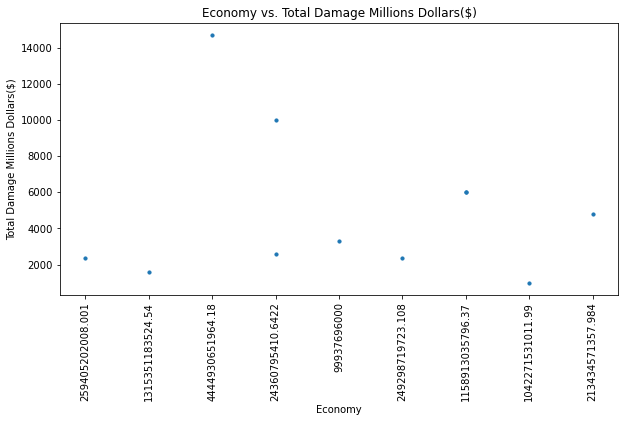

In [43]:
# Create a figure with a specified size
plt.figure(figsize=(10,5))

# Extract the "Value" and "Total Damage Millions Dollars" columns from the dataframe, for rows where the "Eq Primary" column is between 7 and 8
x = merged_economy[(merged_economy['Eq Primary'] > 7) & (merged_economy['Eq Primary'] < 9)]['Value']
y = merged_economy[(merged_economy['Eq Primary'] > 7) & \
                   (merged_economy['Eq Primary'] < 9)]['Total Damage Millions Dollars($)']

# Plot a scatter plot using the extracted columns
plt.scatter(x, y,s = 10)

# Add labels and a title to the plot
plt.xlabel('Economy')
plt.ylabel('Total Damage Millions Dollars($)')
plt.title('Economy vs. Total Damage Millions Dollars($)')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()

Life Expectancy Data Scatter Plot

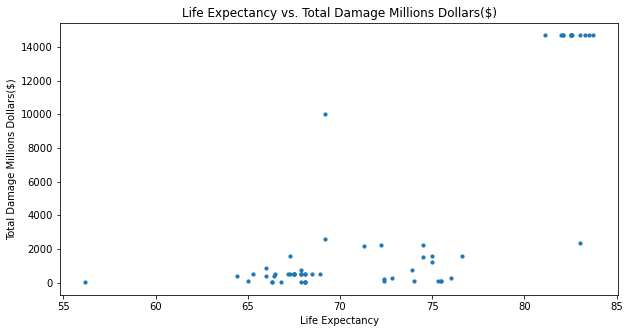

In [44]:
# Create a figure with a specified size
plt.figure(figsize=(10,5))

# Extract the "Life Expectancy" and "Total Damage Millions Dollars" columns from the dataframe, for rows where the "Eq Primary" column is greater than 8
x = merged_lexpect[(merged_lexpect['Eq Primary'] > 7)]\
['Life Expectancy']
y = merged_lexpect[(merged_lexpect['Eq Primary'] > 7)]\
['Total Damage Millions Dollars($)']

# Plot a scatter plot using the extracted columns
plt.scatter(x, y,s = 10)

# Add labels and a title to the plot
plt.xlabel('Life Expectancy')
plt.ylabel('Total Damage Millions Dollars($)')
plt.title('Life Expectancy vs. Total Damage Millions Dollars($)')

# Display the plot
plt.show()

Energy Consumption Data Scatter Plot

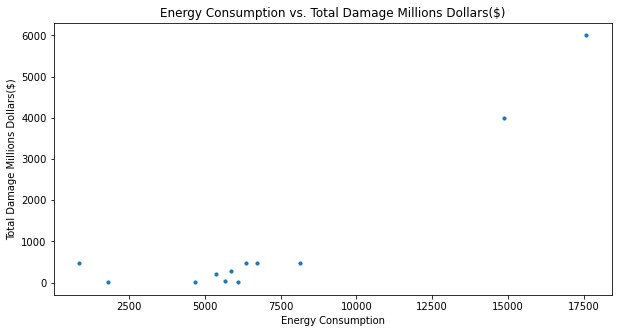

In [45]:
# Create a figure with a specified size
plt.figure(figsize=(10,5))

# Extract the "Energy Consumption Per Capita (Kwh)" and "Total Damage Millions Dollars" columns from the dataframe, for rows where the "Eq Primary" column is between 8 and 9
x = merged_energy[(merged_energy['Eq Primary'] > 8) & (merged_energy['Eq Primary'] < 9)]\
                  ['Energy Consumption (Kwh)']
                  
y = merged_energy[(merged_energy['Eq Primary'] > 8) & (merged_energy['Eq Primary'] < 9)]\
                  ['Total Damage Millions Dollars($)']

# Plot a scatter plot using the extracted columns
plt.scatter(x, y,s = 10)

# Add labels and a title to the plot
plt.xlabel('Energy Consumption')
plt.ylabel('Total Damage Millions Dollars($)')
plt.title('Energy Consumption vs. Total Damage Millions Dollars($)')

# Display the plot
plt.show()

***Correlation Matrices of Merged Datasets***

Text(0.5, 1.0, 'Technology')

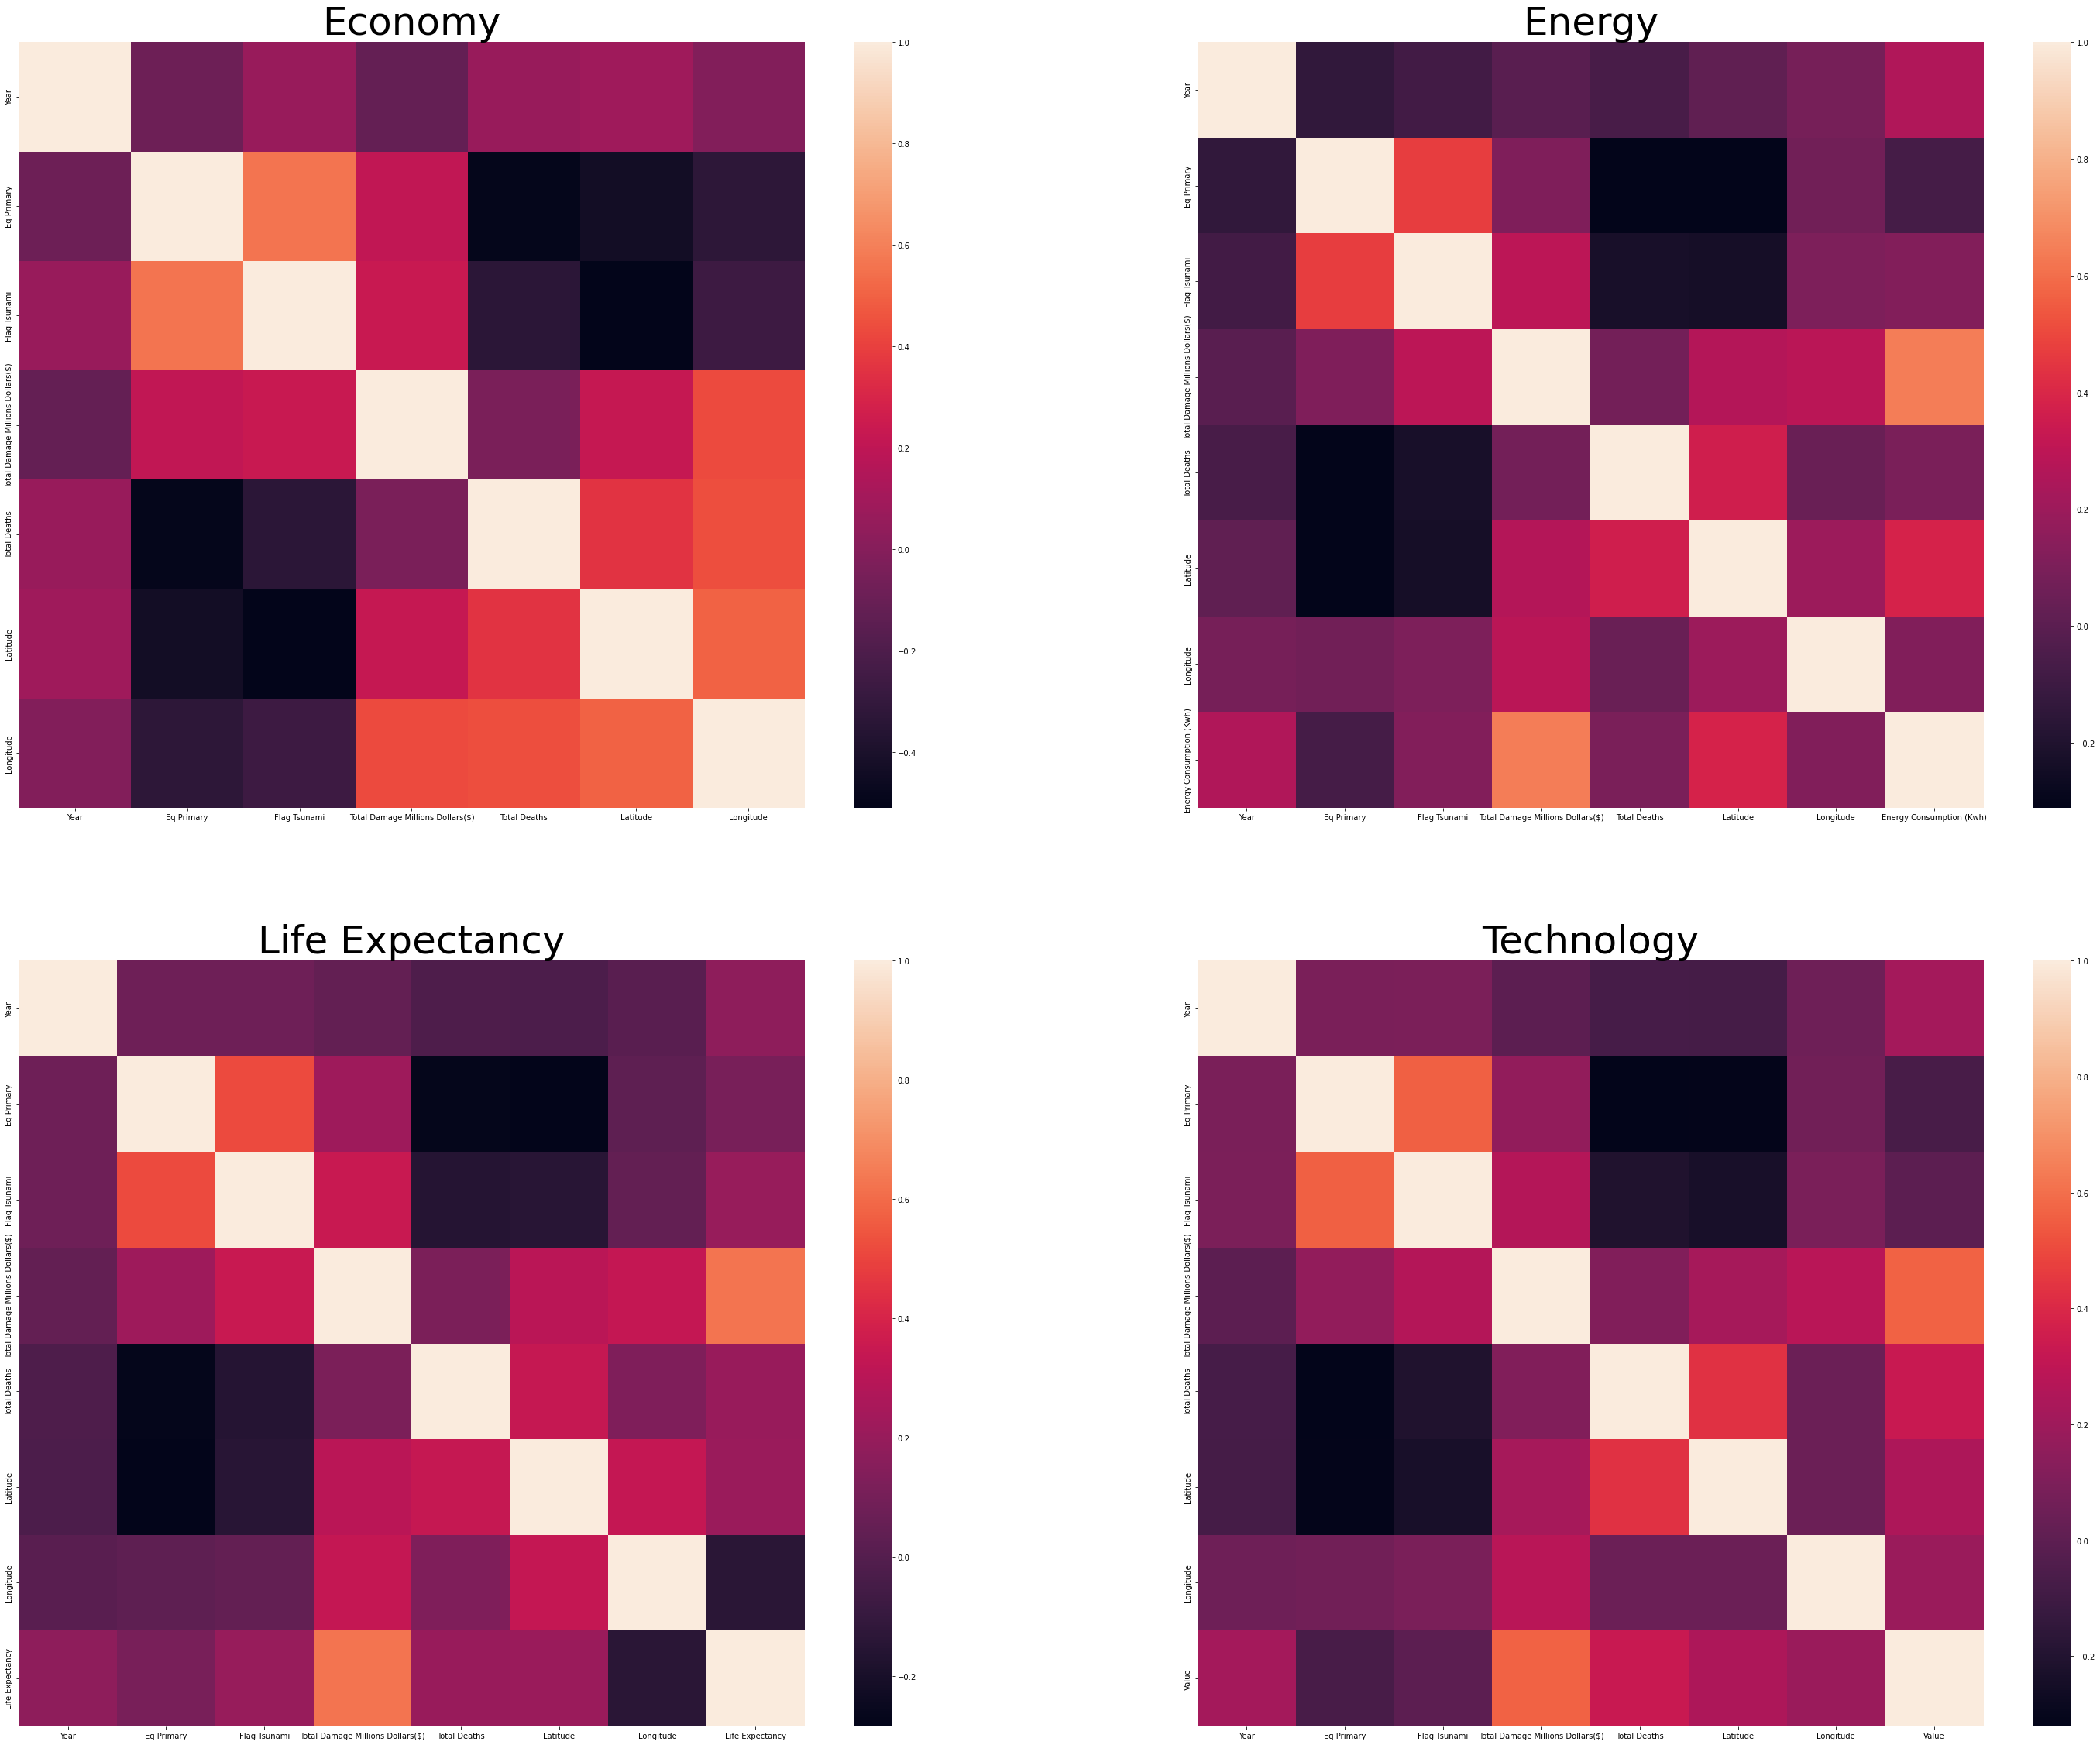

In [46]:
# create a figure and a set of subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(50,40))

# plot the first heatmap on the first subplot
sns.heatmap(merged_economy.corr(), ax=ax[0,0])
ax[0,0].set_title("Economy", fontsize=50)

# plot the second heatmap on the second subplot
sns.heatmap(merged_energy.corr(), ax=ax[0,1])
ax[0,1].set_title("Energy", fontsize=50)
# plot the third heatmap on the second subplot
sns.heatmap(merged_lexpect.corr(), ax=ax[1,0])
ax[1,0].set_title("Life Expectancy", fontsize=50)
# plot the fourth heatmap on the second subplot
sns.heatmap(merged_tech.corr(), ax=ax[1,1])
ax[1,1].set_title("Technology", fontsize=50)

Group earthquakes according to whether they cause a tsunami or not, and plot.

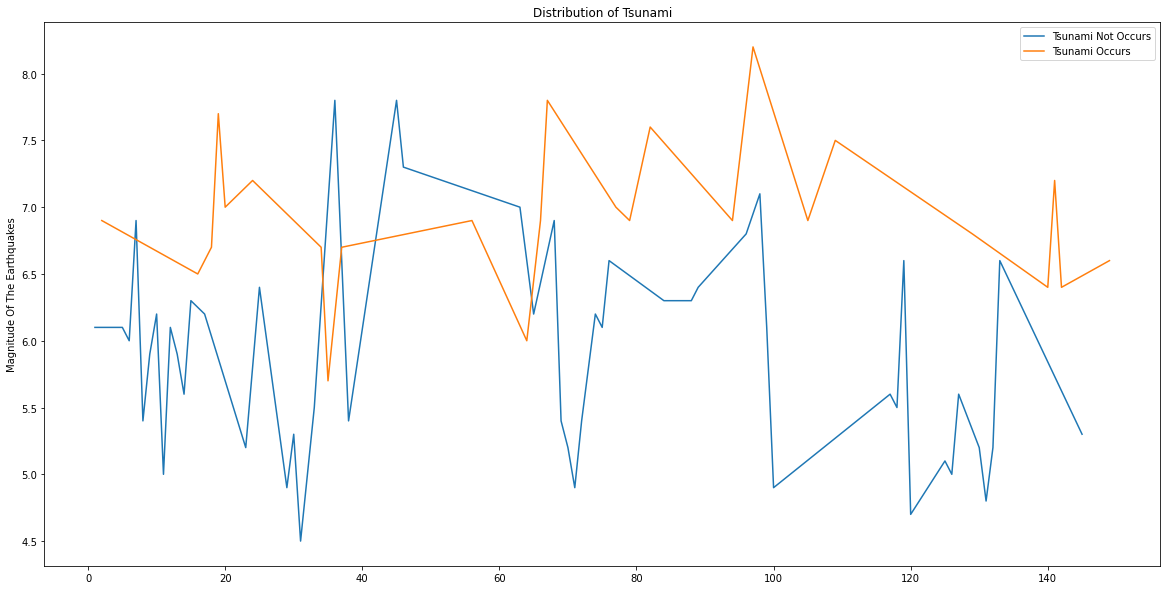

In [47]:
# Create a figure with a specified size
plt.figure(figsize=(20,10))

# Group the data by the "Flag Tsunami" column
grouped = merged_economy.groupby("Flag Tsunami")

# Iterate over the groups and create a separate plot for each group
for name, group in grouped:
    if name == 1: name= "Tsunami Occurs"
    else: name ="Tsunami Not Occurs"
    plt.plot(group["Eq Primary"], label=name)

# Add labels and a title to the plot
plt.ylabel('Magnitude Of The Earthquakes')
plt.title('Distribution of Tsunami')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

Above graph shows us Tsunamis occur more frequently in earthquakes with larger magnitudes.

***Research Questions and Proposed tests***

**Research Question 1**: \
H0: There is no relationship between the financial damage received from earthquakes with a magnitude of 8 to 9 and the energy consumption in the year of the earthquake. \
H1: There is a relationship between the financial damage received from earthquakes with a magnitude of 8 to 9 and the energy consumption in the year of the earthquake.

In [48]:
# Select the columns that we want to compare
col1 = merged_energy[(merged_energy["Eq Primary"] >8) & (merged_energy["Eq Primary"] < 9)\
                    ]['Energy Consumption (Kwh)']
col2 = merged_energy[(merged_energy["Eq Primary"] >8) & (merged_energy["Eq Primary"] < 9)\
                    ]['Total Damage Millions Dollars($)']

# Calculate the Spearman rank correlation coefficient
# It Examines the relationship between two numeric variables.
coefficient, p_value = spearmanr(col1, col2)
print(f"p_value: {p_value}")

p_value: 0.008413264231901082


Since p-value is lower than 0.05, H0 hypothesis is rejected. So, H1 hypothesis is accepted.

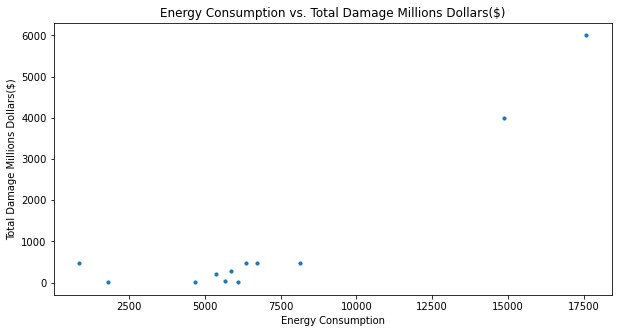

In [49]:
# Create a figure with a specified size
plt.figure(figsize=(10,5))

# Extract the "Energy Consumption Per Capita (Kwh)" and "Total Damage Millions Dollars" columns from the dataframe, for rows where the "Eq Primary" column is between 8 and 9
x = merged_energy[(merged_energy['Eq Primary'] > 8) & (merged_energy['Eq Primary'] < 9)]\
                  ['Energy Consumption (Kwh)']
                  
y = merged_energy[(merged_energy['Eq Primary'] > 8) & (merged_energy['Eq Primary'] < 9)]\
                  ['Total Damage Millions Dollars($)']

# Plot a scatter plot using the extracted columns
plt.scatter(x, y,s = 10)

# Add labels and a title to the plot
plt.xlabel('Energy Consumption')
plt.ylabel('Total Damage Millions Dollars($)')
plt.title('Energy Consumption vs. Total Damage Millions Dollars($)')

# Display the plot
plt.show()

Result: As we can understand from above plot and founded p-value, there is relationship between energy consumption and received damage.

***Research Question 2:***

**Question:** Is there a relationship between life expectancy in the year of the earthquake and total death from the earthquake.

**Hypothesis:** There is a relationship between life expectancy in the year of the earthquake and total death from the earthquake.

Possible ML Methods and Statistical Tests : \
ANOVA (Analysis of Variance),Chi-square test,Correlation analysis,Regression analysis,Scatter plots,Line plots,Box plots,Bar charts,Heat maps,Correlation Test

***Research Question 3:***

**Question:** Does the magnitude of earthquakes have an effect on whether a tsunami will rise or not?

**Hypothesis:** Magnitude of earthquakes have an effect on whether a tsunami will rise or not.

Possible ML Methods and Statistical Tests : \
Classification,Correlation analysis,Multiple regression analysis,Survival analysis,Logistic regression, Chi-square test

***Research Question 4:***

**Question:** Is there a relationship between the financial damage received from earthquakes with the economy in the year of the earthquake?

**Hypothesis:** There is a relationship between the financial damage received from earthquakes with the economy in the year of the earthquake.

Possible ML Methods and Statistical Tests : \
Correlation analysis,Multiple regression analysis,Panel data analysis,Time series analysis,Survival analysis,Structural equation modeling

***Potential Product***

According to the changes in the characteristics of the countries over the years, a forecast is made for the future, and with respect to this, it is predicted how the damage to be taken from the earthquake will change. Thanks to this, governments may adjust their earthquake budget according to these results.

***Issues related to data engineering:***

**Data quality and reliability:** The service affects the budgets of countries. The changes in the budgets benefit or damage the countries significantly. So, the quality and reliability of the data are critical. Regularly, these issues should be controlled.

**Data integration and interoperability:** Within the project, different datasets from various sources are used. Therefore, these datasets should be merged appropriately and formed to be interoperable. For that, the cleaning and organizing of data are necessary.

**Data management and governance:** In order to guarantee that data is accurate, consistent, and in compliance with applicable legislation and policies, sound data management and governance processes are required. Regularly, quality control processes should occur.

**Data processing and analysis:** In order to make predictions, data needs to be processed and analyzed.
Data storage and management: To guarantee that data can be accessed, searched, and updated effectively, it is crucial to have a solid and scalable data storage system in place.

***Issues related to ethics:***

Which laws and regulations might be applicable to our project? \
Which laws and regulations of countries may be related to our project, these laws and regulations should be considered. These may restrict some usage of data to protect countries.


How do we know that the data is valid for its intended use? \
While cleaning and organizing data, removing missing values or records with missing values may lead to increase bias. So, the data which is fit to for the purpose should be used within the project.

How are we achieving ethical accountability? \
The results of the product may affect countries remarkably, and also cause harm such as inconsistent effects on budgets. Therefore, the person who will be responsible for the damages that may arise should be clearly stated.

***Conclusion:*** 

Various datasets are prepared to examine the relationship between various indices showing the development of countries and damage received from earthquakes. Many different visualization techniques are applied, and data is shown clearly. The relationship between the financial damage received from earthquakes with a magnitude of 8 to 9 and the energy consumption in the year of the earthquake is examined and the hypothesis of this is accepted. As we can see in our hypothesis, there is a relationship between energy consumption, which is one of the factors showing the level of development of countries, and damage from earthquakes. Known various indices showing the development of countries can provide foresight to the states in estimating earthquake damage.